# Analise dos dados de chuva da caatinga

Importando bibliotecas

In [ ]:
# Iniciando as bibliotecas usadas para montar um sistema de aprendizado de máquina chamado árvore de decisão
# No qual tem como objetivo criar um "raciocínio" das informações de saída e entrada e fornecer um método no qual seja possivel prever informações 
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
origem = 'drive/My Drive/CNPq/dados_eto.xlsx'
planilha = pd.read_excel(origem)
#csv(origem, sep=';')
plt.style.use("seaborn-bright")
#'classic')

In [ ]:
planilha.head()

,Year,DoY,DoY_cont,Hour,date,Chuva,Tair,UR,es,ew,DPV,Pressao_atmosferica,Pressao_atmosferica.1,temp_solo,Velocidade_do_vento,Rg_ou_SW,Rg_ou_SW2,emissividade,LW_baixo,LW_cima,Rn,LE,H,SEVolt_Avg,G,NEE,u_star,W_10cm,W_20cm,W_30cm,W_40cm,W_50cm,Evotranspiracao_potencial,Delta,Evotranspiracao_real,meses
0,2015,1,366,11.5,2015-01-01 11:30:00,0.0,29.875,36.077,4212.738138,1519.829538,2692.908600,96.91197,96911.97,29.10,2.0278,966.55547,110.17304,0.827989,336.110111,536.792541,655.7,62.642,413.150,7.822,174.85401,-12.3330,0.69988,0.043,0.048,0.056,0.062,0.054,93.898559,0.241849,0.046023,0
1,2015,1,366,12.0,2015-01-01 12:00:00,0.0,31.091,31.008,4515.919576,1400.296342,3115.623234,96.85780,96857.80,30.07,2.1029,1032.44969,117.84648,0.815610,341.361673,552.064883,703.9,26.785,80.685,6.764,190.72627,-6.1410,0.57287,0.043,0.048,0.056,0.062,0.054,100.057310,0.256911,0.019679,0
2,2015,1,366,10.5,2015-01-01 10:30:00,0.0,28.176,47.319,3818.839333,1807.036584,2011.802749,96.96632,96966.32,27.60,2.1435,928.27667,105.71544,0.856487,329.040410,523.901640,627.7,129.340,360.670,5.320,165.63361,-7.4125,0.55694,0.043,0.048,0.056,0.062,0.054,86.383161,0.222051,0.095025,0
3,2015,1,366,11.0,2015-01-01 11:00:00,0.0,29.329,40.266,4082.469144,1643.847026,2438.622119,96.94789,96947.89,28.11,1.8924,993.35063,113.29336,0.839676,333.870249,538.627519,675.3,198.790,459.580,5.109,181.30829,-11.1830,0.77245,0.043,0.048,0.056,0.062,0.054,98.275975,0.235332,0.146050,0
4,2015,1,366,10.0,2015-01-01 10:00:00,0.0,27.101,52.994,3586.520812,1900.640839,1685.879973,96.98846,96988.46,26.88,2.0934,856.23050,97.32560,0.867555,324.504510,508.409410,575.0,282.060,12.262,4.093,148.27950,-3.2308,0.53155,0.043,0.048,0.056,0.062,0.054,79.479019,0.210242,0.207228,0


In [ ]:
planilha.shape

(17511, 36)

In [ ]:
dados = planilha.dropna(axis=0, how='any') # Remover qualquer linhas que possua NaN (células vazias)

In [ ]:
dados.head()

,Year,DoY,DoY_cont,Hour,date,Chuva,Tair,UR,es,ew,DPV,Pressao_atmosferica,Pressao_atmosferica.1,temp_solo,Velocidade_do_vento,Rg_ou_SW,Rg_ou_SW2,emissividade,LW_baixo,LW_cima,Rn,LE,H,SEVolt_Avg,G,NEE,u_star,W_10cm,W_20cm,W_30cm,W_40cm,W_50cm,Evotranspiracao_potencial,Delta,Evotranspiracao_real,meses
0,2015,1,366,11.5,2015-01-01 11:30:00,0.0,29.875,36.077,4212.738138,1519.829538,2692.908600,96.91197,96911.97,29.10,2.0278,966.55547,110.17304,0.827989,336.110111,536.792541,655.7,62.642,413.150,7.822,174.85401,-12.3330,0.69988,0.043,0.048,0.056,0.062,0.054,93.898559,0.241849,0.046023,0
1,2015,1,366,12.0,2015-01-01 12:00:00,0.0,31.091,31.008,4515.919576,1400.296342,3115.623234,96.85780,96857.80,30.07,2.1029,1032.44969,117.84648,0.815610,341.361673,552.064883,703.9,26.785,80.685,6.764,190.72627,-6.1410,0.57287,0.043,0.048,0.056,0.062,0.054,100.057310,0.256911,0.019679,0
2,2015,1,366,10.5,2015-01-01 10:30:00,0.0,28.176,47.319,3818.839333,1807.036584,2011.802749,96.96632,96966.32,27.60,2.1435,928.27667,105.71544,0.856487,329.040410,523.901640,627.7,129.340,360.670,5.320,165.63361,-7.4125,0.55694,0.043,0.048,0.056,0.062,0.054,86.383161,0.222051,0.095025,0
3,2015,1,366,11.0,2015-01-01 11:00:00,0.0,29.329,40.266,4082.469144,1643.847026,2438.622119,96.94789,96947.89,28.11,1.8924,993.35063,113.29336,0.839676,333.870249,538.627519,675.3,198.790,459.580,5.109,181.30829,-11.1830,0.77245,0.043,0.048,0.056,0.062,0.054,98.275975,0.235332,0.146050,0
4,2015,1,366,10.0,2015-01-01 10:00:00,0.0,27.101,52.994,3586.520812,1900.640839,1685.879973,96.98846,96988.46,26.88,2.0934,856.23050,97.32560,0.867555,324.504510,508.409410,575.0,282.060,12.262,4.093,148.27950,-3.2308,0.53155,0.043,0.048,0.056,0.062,0.054,79.479019,0.210242,0.207228,0


In [ ]:
dados.shape

(11945, 36)

In [ ]:
dados['date'] = pd.to_datetime(dados['date'], format="%Y-%m-%d %H:%M:%S")
dados['Year'] = pd.to_datetime(dados['Year'], format="%Y")
#dados['meses'] = pd.to_datetime(dados['meses'], format="%Y-%m")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
dados['meses'] = pd.to_datetime(dados['date']).dt.date

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados['meses'] = pd.to_datetime(dados['meses'], format='%Y-%m-%d').apply(lambda x: x.strftime('%Y-%m'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11945 entries, 0 to 17510
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Year                       11945 non-null  datetime64[ns]
 1   DoY                        11945 non-null  int64         
 2   DoY_cont                   11945 non-null  int64         
 3   Hour                       11945 non-null  float64       
 4   date                       11945 non-null  datetime64[ns]
 5   Chuva                      11945 non-null  float64       
 6   Tair                       11945 non-null  float64       
 7   UR                         11945 non-null  float64       
 8   es                         11945 non-null  float64       
 9   ew                         11945 non-null  float64       
 10  DPV                        11945 non-null  float64       
 11  Pressao_atmosferica        11945 non-null  float64       
 12  Pres

In [ ]:
dados['meses']

0        2015-01
1        2015-01
2        2015-01
3        2015-01
4        2015-01
          ...   
17506    2014-12
17507    2014-12
17508    2014-12
17509    2014-12
17510    2014-12
Name: meses, Length: 11945, dtype: object

In [ ]:
dados["Evotranspiracao_potencial"].value_counts().sort_index()

0.003487      1
0.624264      1
0.726506      1
0.942305      1
1.032265      1
             ..
119.737887    1
121.016741    1
125.206734    1
125.568429    1
129.772818    1
Name: Evotranspiracao_potencial, Length: 11856, dtype: int64

In [ ]:
dados["Tair"].value_counts().sort_index()

13.080    1
14.860    1
15.200    1
15.510    1
15.590    1
         ..
34.280    1
34.310    1
34.339    1
35.808    1
39.580    1
Name: Tair, Length: 4043, dtype: int64

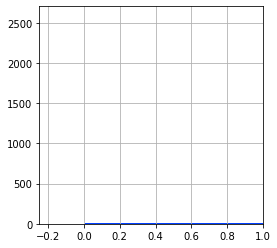

In [ ]:
plt.xlim(-0.25,)
dados["Evotranspiracao_potencial"].hist(bins = 100, figsize = (4,4))

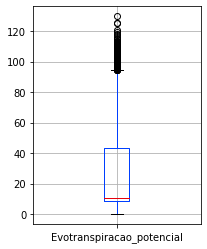

In [ ]:
dados.boxplot(figsize=(3, 4),column=['Evotranspiracao_potencial'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'EToPMF (mm)')

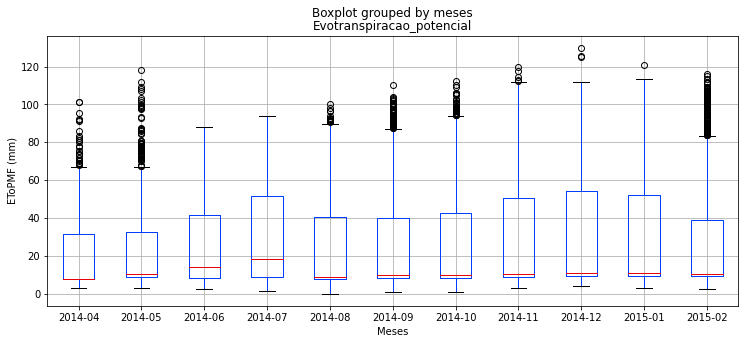

In [ ]:
dados.boxplot(figsize=(12, 5),column=['Evotranspiracao_potencial'],by = 'meses', grid=True)
plt.xlabel("Meses")
plt.ylabel("EToPMF (mm)")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'EToPMF (mm)')

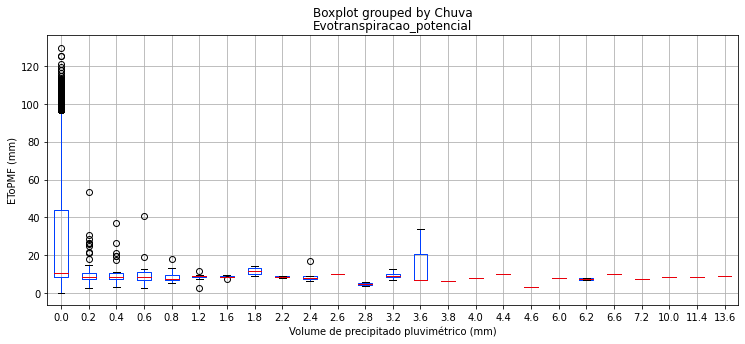

In [ ]:
dados.boxplot(figsize=(12, 5),column=['Evotranspiracao_potencial'],by = 'Chuva', grid=True)
plt.xlabel("Volume de precipitado pluvimétrico (mm)")
plt.ylabel("EToPMF (mm)")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Volume de precipitado pluvimétrico (mm)')

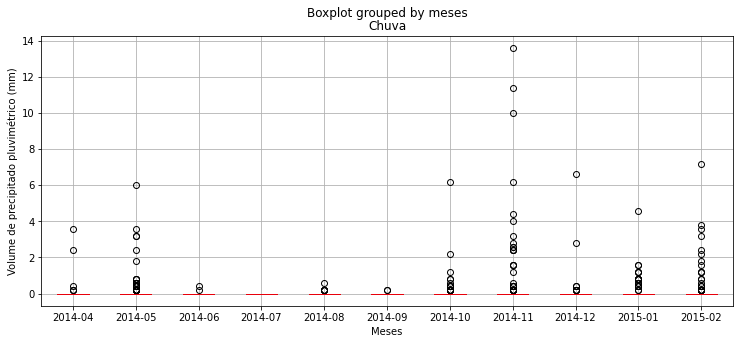

In [ ]:
dados.boxplot(figsize=(12, 5),column=['Chuva'],by = 'meses', grid=True)
plt.xlabel("Meses")
plt.ylabel("Volume de precipitado pluvimétrico (mm)")

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Temperatura do ar (ºC)')

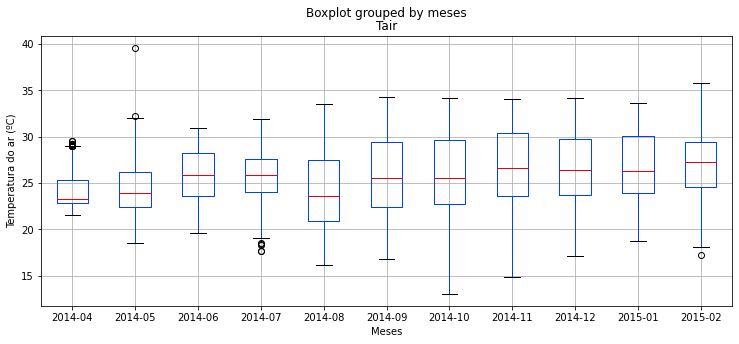

In [ ]:
dados.boxplot(figsize=(12, 5),column=['Tair'],by = 'meses', grid=True)
plt.xlabel("Meses")
plt.ylabel("Temperatura do ar (ºC)")

In [ ]:
dados["Tair"].value_counts(normalize=True).sort_index()

13.080    0.000084
14.860    0.000084
15.200    0.000084
15.510    0.000084
15.590    0.000084
            ...   
34.280    0.000084
34.310    0.000084
34.339    0.000084
35.808    0.000084
39.580    0.000084
Name: Tair, Length: 4043, dtype: float64

In [ ]:
dados["Chuva"].value_counts(normalize=True).sort_index()

0.0     0.986522
0.2     0.005190
0.4     0.002344
0.6     0.000921
0.8     0.001088
1.2     0.000670
1.6     0.000502
1.8     0.000167
2.2     0.000167
2.4     0.000502
2.6     0.000167
2.8     0.000167
3.2     0.000335
3.6     0.000251
3.8     0.000084
4.0     0.000084
4.4     0.000084
4.6     0.000084
6.0     0.000084
6.2     0.000167
6.6     0.000084
7.2     0.000084
10.0    0.000084
11.4    0.000084
13.6    0.000084
Name: Chuva, dtype: float64

In [ ]:
dados["Evotranspiracao_potencial"].value_counts(normalize=True).sort_index()

0.003487      0.000084
0.624264      0.000084
0.726506      0.000084
0.942305      0.000084
1.032265      0.000084
                ...   
119.737887    0.000084
121.016741    0.000084
125.206734    0.000084
125.568429    0.000084
129.772818    0.000084
Name: Evotranspiracao_potencial, Length: 11856, dtype: float64

In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label = None):
    plt.plot(time[start:end], series[start:end], format, label = label)
    plt.xticks(fontsize = 16)
    plt.legend()
    plt.xlabel("Time")
    plt.yticks(fontsize = 16)
    plt.ylabel("Value")
    plt.grid(True)    

No handles with labels found to put in legend.


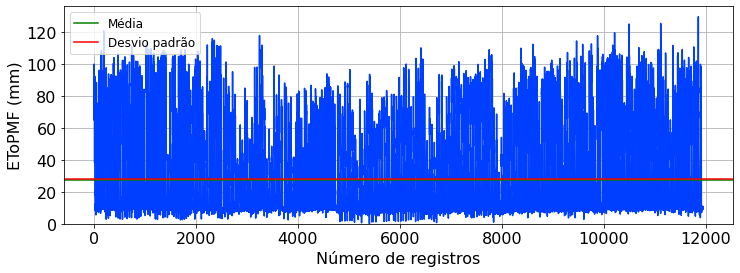

In [ ]:
plt.figure(figsize=(12, 4))
plot_series(np.linspace(1,len(dados),len(dados)),dados.Evotranspiracao_potencial,'-')
plt.axhline(y=dados.Evotranspiracao_potencial.mean(), c = 'g', label = 'Média')
plt.axhline(y=dados.Evotranspiracao_potencial.std(), c = 'r', label = 'Desvio padrão')
plt.xlabel("Número de registros", fontsize = 16)
plt.ylabel("EToPMF (mm)", fontsize = 16)
plt.ylim(0,)
plt.legend(loc='upper left',fontsize = 12)

In [ ]:
dados["Evotranspiracao_potencial"].mean() # média simples

27.609963191983436

In [ ]:
dados["Evotranspiracao_potencial"].std() # Retorna o desvio padrão da amostra sobre o eixo solicitado

28.16884812518502

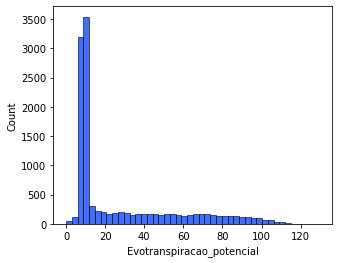

In [ ]:
plt.figure(figsize=(5,4))
sns.histplot(dados, x = "Evotranspiracao_potencial")

Normalizando os dados de fechamento

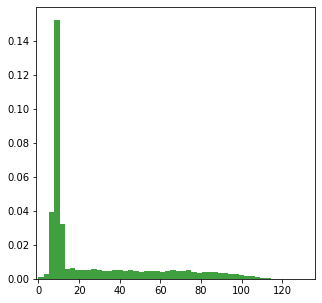

Média dos valores normalizados 2.9041719935662247
Desvio Padrão dos valores normalizados 0.8624633887609473


In [ ]:
series = dados.Evotranspiracao_potencial
plt.figure(figsize=(5,5))
plt.hist(series, 50, density=True, facecolor='g', alpha=0.75)
plt.xlim(-1,)
plt.show()
iteração = np.linspace(1,len(dados),len(dados))
percent_train = .7
divisao = int(percent_train*len(dados))
ln_series = np.log(series+1)
y_treino = ln_series[:divisao]
xm = y_treino.mean()
Sx = y_treino.std()
print("Média dos valores normalizados", xm)
print("Desvio Padrão dos valores normalizados",Sx)
series = (ln_series - xm)/Sx

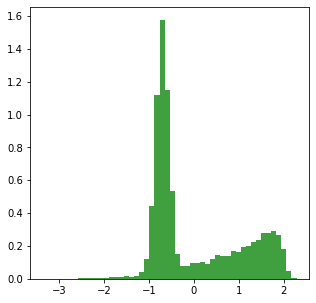

In [ ]:
plt.figure(figsize=(5,5))
plt.hist(series, 50, density=True, facecolor='g', alpha=0.75)
plt.show()

In [ ]:
dados['series'] = series

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados.head()

,Year,DoY,DoY_cont,Hour,date,Chuva,Tair,UR,es,ew,DPV,Pressao_atmosferica,Pressao_atmosferica.1,temp_solo,Velocidade_do_vento,Rg_ou_SW,Rg_ou_SW2,emissividade,LW_baixo,LW_cima,Rn,LE,H,SEVolt_Avg,G,NEE,u_star,W_10cm,W_20cm,W_30cm,W_40cm,W_50cm,Evotranspiracao_potencial,Delta,Evotranspiracao_real,meses,series
0,2015-01-01,1,366,11.5,2015-01-01 11:30:00,0.0,29.875,36.077,4212.738138,1519.829538,2692.908600,96.91197,96911.97,29.10,2.0278,966.55547,110.17304,0.827989,336.110111,536.792541,655.7,62.642,413.150,7.822,174.85401,-12.3330,0.69988,0.043,0.048,0.056,0.062,0.054,93.898559,0.241849,0.046023,2015-01,1.911544
1,2015-01-01,1,366,12.0,2015-01-01 12:00:00,0.0,31.091,31.008,4515.919576,1400.296342,3115.623234,96.85780,96857.80,30.07,2.1029,1032.44969,117.84648,0.815610,341.361673,552.064883,703.9,26.785,80.685,6.764,190.72627,-6.1410,0.57287,0.043,0.048,0.056,0.062,0.054,100.057310,0.256911,0.019679,2015-01,1.984450
2,2015-01-01,1,366,10.5,2015-01-01 10:30:00,0.0,28.176,47.319,3818.839333,1807.036584,2011.802749,96.96632,96966.32,27.60,2.1435,928.27667,105.71544,0.856487,329.040410,523.901640,627.7,129.340,360.670,5.320,165.63361,-7.4125,0.55694,0.043,0.048,0.056,0.062,0.054,86.383161,0.222051,0.095025,2015-01,1.815881
3,2015-01-01,1,366,11.0,2015-01-01 11:00:00,0.0,29.329,40.266,4082.469144,1643.847026,2438.622119,96.94789,96947.89,28.11,1.8924,993.35063,113.29336,0.839676,333.870249,538.627519,675.3,198.790,459.580,5.109,181.30829,-11.1830,0.77245,0.043,0.048,0.056,0.062,0.054,98.275975,0.235332,0.146050,2015-01,1.963830
4,2015-01-01,1,366,10.0,2015-01-01 10:00:00,0.0,27.101,52.994,3586.520812,1900.640839,1685.879973,96.98846,96988.46,26.88,2.0934,856.23050,97.32560,0.867555,324.504510,508.409410,575.0,282.060,12.262,4.093,148.27950,-3.2308,0.53155,0.043,0.048,0.056,0.062,0.054,79.479019,0.210242,0.207228,2015-01,1.720449


Aplicando o teste de correlação

In [ ]:
dados.columns.values

array(['Year', 'DoY', 'DoY_cont', 'Hour', 'date', 'Chuva', 'Tair', 'UR',
       'es', 'ew', 'DPV', 'Pressao_atmosferica', 'Pressao_atmosferica.1',
       'temp_solo', 'Velocidade_do_vento', 'Rg_ou_SW', 'Rg_ou_SW2',
       'emissividade', 'LW_baixo', 'LW_cima', 'Rn', 'LE', 'H',
       'SEVolt_Avg', 'G', 'NEE', 'u_star', 'W_10cm', 'W_20cm', 'W_30cm',
       'W_40cm', 'W_50cm', 'Evotranspiracao_potencial', 'Delta',
       'Evotranspiracao_real', 'meses', 'series'], dtype=object)

In [ ]:
dadostestes = ['Year', 'DoY', 'DoY_cont', 'Hour', 'date', 'Chuva', 'Tair', 'UR',
       'es', 'ew', 'DPV', 'Pressao_atmosferica', 'Pressao_atmosferica.1',
       'temp_solo', 'Velocidade_do_vento', 'Rg_ou_SW', 'Rg_ou_SW2',
       'emissividade', 'LW_baixo', 'LW_cima', 'Rn', 'LE', 'H',
       'SEVolt_Avg', 'G', 'NEE', 'u_star', 'W_10cm', 'W_20cm', 'W_30cm',
       'W_40cm', 'W_50cm', 'Evotranspiracao_potencial', 'Delta',
       'Evotranspiracao_real', 'series']
dadostestes = dados[dadostestes]

In [ ]:
correlacao = dadostestes.corr()
correlacao

,DoY,DoY_cont,Hour,Chuva,Tair,UR,es,ew,DPV,Pressao_atmosferica,Pressao_atmosferica.1,temp_solo,Velocidade_do_vento,Rg_ou_SW,Rg_ou_SW2,emissividade,LW_baixo,LW_cima,Rn,LE,H,SEVolt_Avg,G,NEE,u_star,W_10cm,W_20cm,W_30cm,W_40cm,W_50cm,Evotranspiracao_potencial,Delta,Evotranspiracao_real,series
DoY,1.000000,-0.115808,0.001579,-0.003080,0.001210,-0.101514,0.010238,-0.197953,0.072750,-0.047326,-0.047326,0.164942,0.154574,0.030071,0.030519,-0.167968,-0.002087,0.020766,0.031640,-0.024969,0.023382,0.023246,0.031640,-0.008809,0.115996,0.190638,0.130998,0.254690,0.293859,0.327575,0.019680,0.008852,-0.024969,0.012713
DoY_cont,-0.115808,1.000000,-0.061066,0.010748,0.233450,-0.206123,0.235613,-0.082023,0.219296,-0.404770,-0.404770,0.370074,-0.203978,0.027945,0.030116,-0.142574,0.234380,0.046259,0.035770,-0.027042,0.046575,-0.031767,0.035770,-0.042934,0.084707,-0.131442,-0.171922,-0.034395,0.013884,0.056460,0.072390,0.235431,-0.027042,0.050079
Hour,0.001579,-0.061066,1.000000,0.000344,0.427392,-0.412824,0.414258,-0.218666,0.409782,-0.120598,-0.120598,0.315938,0.188782,0.017328,0.017839,-0.314765,0.423904,0.090524,0.019151,-0.002508,-0.055658,-0.000283,0.019151,0.015523,0.027384,0.005541,0.004300,-0.000996,-0.005311,-0.004630,0.030272,0.416701,-0.002508,0.041626
Chuva,-0.003080,0.010748,0.000344,1.000000,-0.096036,0.052313,-0.082990,-0.022557,-0.060510,-0.038483,-0.038483,-0.049580,-0.027263,-0.038269,-0.038563,0.006274,-0.094801,-0.047899,-0.039263,0.010963,-0.026814,-0.077557,-0.039263,0.031450,-0.001086,0.103157,0.095170,0.077853,0.039292,0.019481,-0.039864,-0.084897,0.010963,-0.047358
Tair,0.001210,0.233450,0.427392,-0.096036,1.000000,-0.875453,0.994738,-0.393626,0.941241,-0.390308,-0.390308,0.709386,0.175926,0.546122,0.546026,-0.630087,0.999684,0.660624,0.544719,0.140782,0.296998,0.476856,0.544719,-0.360187,0.288577,-0.093604,-0.128730,-0.049078,-0.023831,-0.010256,0.578612,0.996242,0.140782,0.600821
UR,-0.101514,-0.206123,-0.412824,0.052313,-0.875453,1.000000,-0.878523,0.769190,-0.968377,0.225814,0.225814,-0.704656,-0.290333,-0.480119,-0.480590,0.916512,-0.865974,-0.572573,-0.480900,-0.028373,-0.264741,-0.429406,-0.480900,0.319754,-0.340552,0.209564,0.240362,0.141300,0.123251,0.100286,-0.496272,-0.878842,-0.028373,-0.513473
es,0.010238,0.235613,0.414258,-0.082990,0.994738,-0.878523,1.000000,-0.424774,0.955673,-0.397796,-0.397796,0.711924,0.164669,0.548001,0.547862,-0.653024,0.995654,0.661912,0.546439,0.131523,0.282444,0.468837,0.546439,-0.365824,0.270770,-0.093010,-0.126655,-0.049372,-0.026523,-0.012800,0.583153,0.999873,0.131523,0.598848
ew,-0.197953,-0.082023,-0.218666,-0.022557,-0.393626,0.769190,-0.424774,1.000000,-0.672493,-0.021094,-0.021094,-0.452139,-0.278980,-0.204997,-0.205866,0.960113,-0.378470,-0.239227,-0.207753,0.156971,-0.076564,-0.185935,-0.207753,0.136727,-0.220488,0.263159,0.275543,0.197189,0.197851,0.172698,-0.199235,-0.420523,0.156971,-0.193137
DPV,0.072750,0.219296,0.409782,-0.060510,0.941241,-0.968377,0.955673,-0.672493,1.000000,-0.318347,-0.318347,0.729064,0.225354,0.514675,0.514844,-0.846120,0.937060,0.618932,0.514294,0.056471,0.255806,0.443756,0.514294,-0.343537,0.293070,-0.161625,-0.193159,-0.104494,-0.086030,-0.066631,0.541539,0.954186,0.056471,0.552386
Pressao_atmosferica,-0.047326,-0.404770,-0.120598,-0.038483,-0.390308,0.225814,-0.397796,-0.021094,-0.318347,1.000000,1.000000,-0.402365,0.371592,0.160636,0.159519,0.089352,-0.396360,0.073752,0.156271,0.000188,0.218840,0.240014,0.156271,-0.170714,0.136258,-0.162314,-0.113827,-0.208190,-0.255185,-0.261845,0.091419,-0.396768,0.000188,0.086788


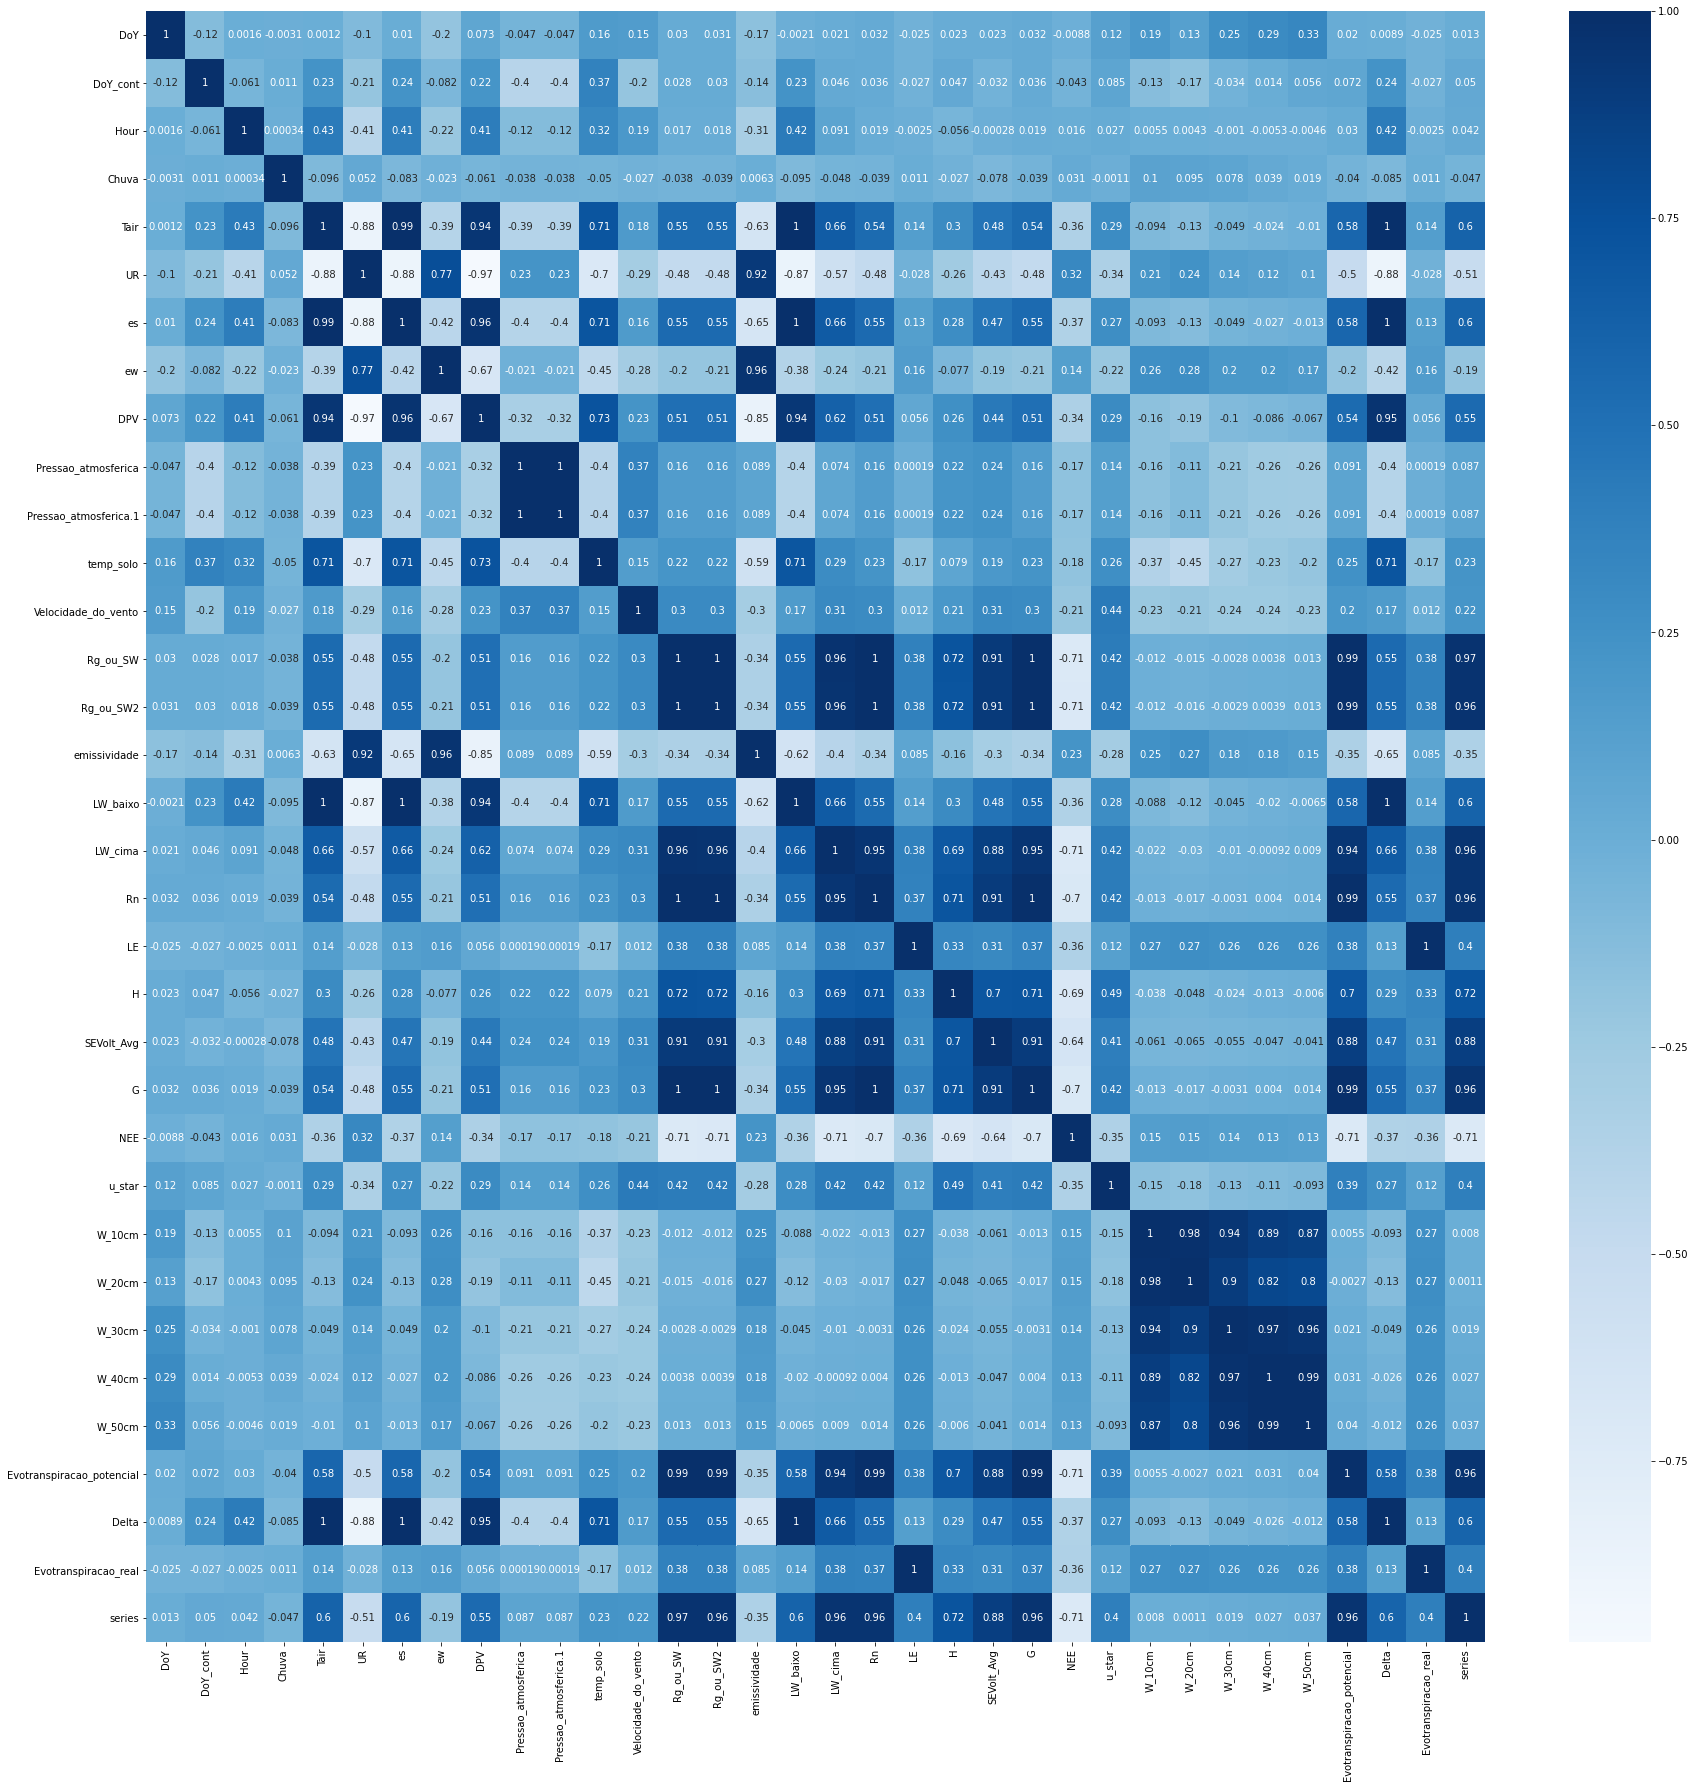

In [ ]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)

In [ ]:
#plt.figure(figsize=(10, 10))
#sns.pairplot(dadostestes)

# Organizando os dados

In [ ]:
dados.columns.values

array(['Year', 'DoY', 'DoY_cont', 'Hour', 'date', 'Chuva', 'Tair', 'UR',
       'es', 'ew', 'DPV', 'Pressao_atmosferica', 'Pressao_atmosferica.1',
       'temp_solo', 'Velocidade_do_vento', 'Rg_ou_SW', 'Rg_ou_SW2',
       'emissividade', 'LW_baixo', 'LW_cima', 'Rn', 'LE', 'H',
       'SEVolt_Avg', 'G', 'NEE', 'u_star', 'W_10cm', 'W_20cm', 'W_30cm',
       'W_40cm', 'W_50cm', 'Evotranspiracao_potencial', 'Delta',
       'Evotranspiracao_real', 'meses', 'series'], dtype=object)

In [ ]:
dados.head()

,Year,DoY,DoY_cont,Hour,date,Chuva,Tair,UR,es,ew,DPV,Pressao_atmosferica,Pressao_atmosferica.1,temp_solo,Velocidade_do_vento,Rg_ou_SW,Rg_ou_SW2,emissividade,LW_baixo,LW_cima,Rn,LE,H,SEVolt_Avg,G,NEE,u_star,W_10cm,W_20cm,W_30cm,W_40cm,W_50cm,Evotranspiracao_potencial,Delta,Evotranspiracao_real,meses,series
0,2015-01-01,1,366,11.5,2015-01-01 11:30:00,0.0,29.875,36.077,4212.738138,1519.829538,2692.908600,96.91197,96911.97,29.10,2.0278,966.55547,110.17304,0.827989,336.110111,536.792541,655.7,62.642,413.150,7.822,174.85401,-12.3330,0.69988,0.043,0.048,0.056,0.062,0.054,93.898559,0.241849,0.046023,2015-01,1.911544
1,2015-01-01,1,366,12.0,2015-01-01 12:00:00,0.0,31.091,31.008,4515.919576,1400.296342,3115.623234,96.85780,96857.80,30.07,2.1029,1032.44969,117.84648,0.815610,341.361673,552.064883,703.9,26.785,80.685,6.764,190.72627,-6.1410,0.57287,0.043,0.048,0.056,0.062,0.054,100.057310,0.256911,0.019679,2015-01,1.984450
2,2015-01-01,1,366,10.5,2015-01-01 10:30:00,0.0,28.176,47.319,3818.839333,1807.036584,2011.802749,96.96632,96966.32,27.60,2.1435,928.27667,105.71544,0.856487,329.040410,523.901640,627.7,129.340,360.670,5.320,165.63361,-7.4125,0.55694,0.043,0.048,0.056,0.062,0.054,86.383161,0.222051,0.095025,2015-01,1.815881
3,2015-01-01,1,366,11.0,2015-01-01 11:00:00,0.0,29.329,40.266,4082.469144,1643.847026,2438.622119,96.94789,96947.89,28.11,1.8924,993.35063,113.29336,0.839676,333.870249,538.627519,675.3,198.790,459.580,5.109,181.30829,-11.1830,0.77245,0.043,0.048,0.056,0.062,0.054,98.275975,0.235332,0.146050,2015-01,1.963830
4,2015-01-01,1,366,10.0,2015-01-01 10:00:00,0.0,27.101,52.994,3586.520812,1900.640839,1685.879973,96.98846,96988.46,26.88,2.0934,856.23050,97.32560,0.867555,324.504510,508.409410,575.0,282.060,12.262,4.093,148.27950,-3.2308,0.53155,0.043,0.048,0.056,0.062,0.054,79.479019,0.210242,0.207228,2015-01,1.720449


# Support vector machine

In [ ]:
dados.columns.values

array(['Year', 'DoY', 'DoY_cont', 'Hour', 'date', 'Chuva', 'Tair', 'UR',
       'es', 'ew', 'DPV', 'Pressao_atmosferica', 'Pressao_atmosferica.1',
       'temp_solo', 'Velocidade_do_vento', 'Rg_ou_SW', 'Rg_ou_SW2',
       'emissividade', 'LW_baixo', 'LW_cima', 'Rn', 'LE', 'H',
       'SEVolt_Avg', 'G', 'NEE', 'u_star', 'W_10cm', 'W_20cm', 'W_30cm',
       'W_40cm', 'W_50cm', 'Evotranspiracao_potencial', 'Delta',
       'Evotranspiracao_real', 'meses', 'series'], dtype=object)

In [ ]:
#entrada = [['tempmedpoceano', 'laninalanino', 'pressaoatmPa', 'tempsolo', 'velocidadedovento']]
# saida = ['ultimo']  já que normalizamos os dados de chuva, então esses não vão ser usados

#[['DoY', 'Tair', 'UR', 'Velocidade_do_vento', 'Rn']]
#dados[entrada]
#valor_saida = dados[saida]
# já que normalizamos os dados
dados = dados.dropna(axis=0, how='any') # Remover qualquer linhas que possua NaN (células vazias)
valor_saida = dados[['series']]
valor_entrada = dados[['Tair', 'H', 'Rn']] 

In [ ]:
x = valor_entrada
y = valor_saida

Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
#qualquer valor
SEED = 0 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=SEED)


In [ ]:
len(x_treino)

8361

In [ ]:
len(y_treino)

8361

In [ ]:
x_treino

,Tair,H,Rn
15680,26.700,-11.723000,0.00
14823,22.660,32.805000,0.00
14971,29.190,296.080000,636.90
1645,28.579,-1.794300,90.60
14956,22.530,-4.121800,0.00
...,...,...,...
10205,26.530,-14.320000,0.00
6162,21.640,0.228090,0.00
15374,19.820,-0.061065,15.93
16331,23.580,60.063000,120.20


In [ ]:
y_treino

,series
15680,-0.683480
14823,-0.680336
14971,1.604335
1645,0.218725
14956,-0.754985
...,...
10205,-0.699776
6162,-0.551699
15374,-0.312023
16331,0.427924


In [ ]:
from sklearn import svm
modelo = svm.SVR()
modelo.fit(x_treino, y_treino.values.ravel())
predicoes = modelo.predict(x_teste)

# Métricas de avaliação do teste ( SVM )

In [ ]:
temporario = y_teste.copy()
temporario

,series
12814,1.656393
16247,-0.474357
16137,1.460434
16606,1.824774
2181,-0.571993
...,...
1464,-0.688453
13297,1.143196
13731,1.511618
11351,-0.840208


In [ ]:
temporario['series'] = predicoes.reshape(3584,1).copy()
temporario

,series
12814,1.622718
16247,-0.724511
16137,1.464668
16606,1.784506
2181,-0.690286
...,...
1464,-0.669643
13297,1.419443
13731,1.473400
11351,-0.731236


In [ ]:
predicoes.reshape(3584,1)

array([[ 1.62271764],
       [-0.7245113 ],
       [ 1.46466773],
       ...,
       [ 1.47340018],
       [-0.73123553],
       [ 1.23075655]])

In [ ]:
y_teste

,series
12814,1.656393
16247,-0.474357
16137,1.460434
16606,1.824774
2181,-0.571993
...,...
1464,-0.688453
13297,1.143196
13731,1.511618
11351,-0.840208


Encontrando o NSE e o MAE

NSE = series    0.969709
dtype: float64
MAE = 0.09848274696083778


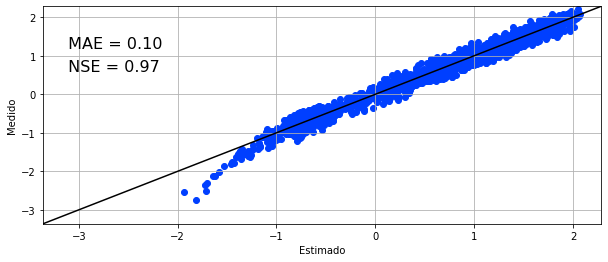

In [ ]:
from sklearn.metrics import mean_absolute_error
#predicoes = predicoes.reshape(1404, 1)
Min = series.min()
Max = series.max()
plt.figure(figsize=(10,4))
plt.scatter(temporario, y_teste)
plt.plot([Min,Max],[Min,Max],'-', c = 'black')
plt.ylim([Min,Max])
plt.xlim([Min,Max])
plt.xticks()
plt.xlabel("Estimado")
plt.yticks()
plt.ylabel("Medido")
plt.grid(True)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)
plt.text(Min+.2,.13*Max+.3," NSE = %.2f"%(NSE(y_teste, temporario)), size = 16)
plt.text(Min+.2,.13*Max+.9," MAE = %.2f"%(mean_absolute_error(y_teste, temporario)), size = 16)
print('NSE =',NSE(y_teste, temporario))
print('MAE =', mean_absolute_error(y_teste, temporario))

In [ ]:
# A eficiência de modelagem Nash e Sutcliffe (NASH e SUTCLIFFE, 1970) limitado (NSE)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)

print('NSE =',NSE(y_teste, temporario))

NSE = series    0.969709
dtype: float64


In [ ]:
# o índice de concordância de Willmott (d)
def d(medido, estimado):
    medido_medio = np.mean( medido )
    s = np.sum( ( estimado - medido )**2 )
    i = np.sum(np.absolute( estimado - medido_medio ) + np.absolute( medido - medido_medio ))
    
    return 1 - s/i

print('d =',d(y_teste, temporario))

d = series    0.991272
dtype: float64


In [ ]:
# coeficiente de correlação de Pearson (r)
def r(medido, estimado):
    medido_medio = np.mean( medido )
    estimado_medio = np.mean( estimado )
    s = np.sum((medido - medido_medio)*(estimado - estimado_medio))
    i = ((np.sum((estimado - estimado_medio)**(2)))**(1/2))*((np.sum((medido - medido_medio)**(2)))**(1/2))

    return s/i

print('r =',r(y_teste, temporario))

r = series    0.992321
dtype: float64


In [ ]:
# O índice de desempenho do modelo (c)
def c(medido, estimado):
    return d(medido, estimado)*r(medido, estimado)

print('c =',c(y_teste, temporario))

c = series    0.983659
dtype: float64


In [ ]:
# Coeficiente de Klinga – Gupta limitado (KGE)
def KGE(medido, estimado):
    desvio_padrao_medido = np.std(medido)
    desvio_padrao_estimado = np.std(estimado)
    estimado_medio = np.mean( estimado )
    kge = 1 - ( (r(medido, estimado) - 1)**2 + ((estimado_medio/medido) - 1)**2 + ((desvio_padrao_estimado/desvio_padrao_medido) - 1)**2 )**(1/2)

    return kge/(2-kge)

print('KGE =',np.mean(KGE(y_teste, temporario)))

KGE = series   -0.009448
dtype: float64


In [ ]:
# R²
def R2(medido, estimado):
    cima = (len(medido)*(np.sum(medido*estimado))-np.sum(medido)*np.sum(estimado))**2
    baixo = (len(medido)*np.sum((medido)**2)-(np.sum(medido))**2)*(len(medido)*np.sum((estimado)**2)-(np.sum(medido))**2)
    r2 = cima/baixo
    return r2

print(f'R² ={R2(y_teste, temporario)}')

R² =series    0.98443
dtype: float64


In [ ]:
#RMSE -  Raiz do Erro Quadrático Médio
def RMSE(medido, estimado):
    rmse = ((1/len(medido))*(np.sum((medido - estimado)**2)))**(1/2)
    return rmse

print(f'RMSE ={RMSE(y_teste, temporario)}')

RMSE =series    0.125883
dtype: float64


outras metricas


In [ ]:
from sklearn.metrics import explained_variance_score
# Variância explicada 
explained_variance_score(y_teste, temporario)

0.984639811720305

In [ ]:
from sklearn.metrics import max_error
# Erro máximo ( residual )
max_error(y_teste, temporario)

0.9211410032601788

In [ ]:
from sklearn.metrics import mean_absolute_error
# Erro médio absoluto MAE
mean_absolute_error(y_teste, temporario)

0.09848274696083778

In [ ]:
from sklearn.metrics import mean_squared_error
# Erro quadrático médio
mean_squared_error(y_teste, temporario)

0.0158466231861376

In [ ]:
from sklearn.metrics import r2_score
# score R² 
r2_score(y_teste, temporario)

0.9846216671472979

In [ ]:
#Artur pediu a raiz o r² como parâmetro avaliativo
(r2_score(y_teste, temporario))**(1/2)

0.9922810424205927

In [ ]:
from sklearn.metrics import mean_squared_log_error
# Erro logarítmico médio quadrático
mean_squared_log_error(abs(y_teste), abs(temporario))

0.004753061265602233

In [ ]:
#Erro absoluto mediano 
from sklearn.metrics import median_absolute_error
median_absolute_error(y_teste, temporario)

0.0832607850392132

# A árvore de decisão

In [ ]:
#entrada = [['tempmedpoceano', 'laninalanino', 'pressaoatmPa', 'tempsolo', 'velocidadedovento']]
# saida = ['ultimo']  já que normalizamos os dados de chuva, então esses não vão ser usados

#[['DoY', 'Tair', 'UR', 'Velocidade_do_vento', 'Rn']]
#dados[entrada]
#valor_saida = dados[saida]
# já que normalizamos os dados
valor_saida = dados[['series']]
valor_entrada = dados[['Tair', 'H', 'Rn']] 

In [ ]:
x = valor_entrada
y = valor_saida

Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
#qualquer valor
SEED = 0 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=SEED)


In [ ]:
len(x_treino)

8361

In [ ]:
len(y_treino)

8361

In [ ]:
x_treino

,Tair,H,Rn
15680,26.700,-11.723000,0.00
14823,22.660,32.805000,0.00
14971,29.190,296.080000,636.90
1645,28.579,-1.794300,90.60
14956,22.530,-4.121800,0.00
...,...,...,...
10205,26.530,-14.320000,0.00
6162,21.640,0.228090,0.00
15374,19.820,-0.061065,15.93
16331,23.580,60.063000,120.20


In [ ]:
y_treino

,series
15680,-0.683480
14823,-0.680336
14971,1.604335
1645,0.218725
14956,-0.754985
...,...
10205,-0.699776
6162,-0.551699
15374,-0.312023
16331,0.427924


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
def regressor_arvore(nivel):
    SEED= 0
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Nivel {nivel} | Treino = {(resultados['train_score']*-1).mean()} | Teste = {(resultados['test_score']*-1).mean()}")
    treino.append((resultados['train_score']*-1).mean())
    teste.append((resultados['test_score']*-1).mean())

In [ ]:
iteracoes = []
treino = []
teste = []
for i in range(1,21):
    resultados = regressor_arvore(i)
    iteracoes.append(i)

Nivel 1 | Treino = 0.14088908707577913 | Teste = 0.14108758987932762
Nivel 2 | Treino = 0.05475423247048996 | Teste = 0.055258118098356214
Nivel 3 | Treino = 0.02896886304772293 | Teste = 0.029866300352206547
Nivel 4 | Treino = 0.021161017320731258 | Teste = 0.022165289244514972
Nivel 5 | Treino = 0.017687705337760585 | Teste = 0.01890870495085762
Nivel 6 | Treino = 0.015305239931917158 | Teste = 0.01706492421821295
Nivel 7 | Treino = 0.01348944307622792 | Teste = 0.01566962028760484
Nivel 8 | Treino = 0.012361315166791722 | Teste = 0.015521100993777754
Nivel 9 | Treino = 0.011340836689794648 | Teste = 0.01610274925717799
Nivel 10 | Treino = 0.010334109385901565 | Teste = 0.01667225420287528
Nivel 11 | Treino = 0.009349465170164394 | Teste = 0.01756419789191465
Nivel 12 | Treino = 0.008424380014109773 | Teste = 0.01820024168176782
Nivel 13 | Treino = 0.007561645776544853 | Teste = 0.019150369885378583
Nivel 14 | Treino = 0.006783007223503353 | Teste = 0.01983832272948725
Nivel 15 | Tre

Resultado da validação cruzada

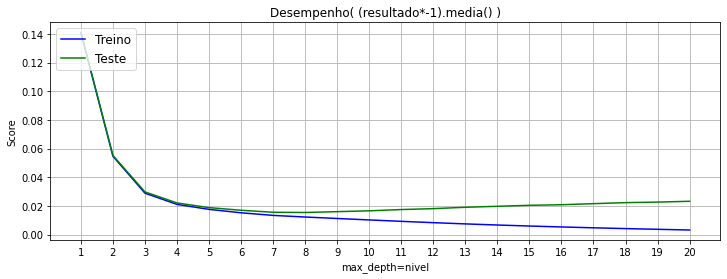

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( iteracoes, treino, color='blue', label = 'Treino')
plt.plot( iteracoes, teste, color='green', label = 'Teste')
plt.title('Desempenho( (resultado*-1).media() )')
plt.xlabel('max_depth=nivel')
plt.ylabel('Score')
plt.legend(loc='upper left',fontsize = 12)
plt.xticks(iteracoes)
plt.grid('True')
plt.show()

In [ ]:
data = {'treino':  treino,'teste': teste}

resultadoso = pd.DataFrame(data, columns = ['Treino','Teste'])

print (resultadoso)

Empty DataFrame
Columns: [Treino, Teste]
Index: []


In [ ]:
resultadoso['Treino'] = treino
resultadoso['Teste'] = teste

In [ ]:
resultadoso

,Treino,Teste
0,0.140889,0.141088
1,0.054754,0.055258
2,0.028969,0.029866
3,0.021161,0.022165
4,0.017688,0.018909
5,0.015305,0.017065
6,0.013489,0.015670
7,0.012361,0.015521
8,0.011341,0.016103
9,0.010334,0.016672


Text(0, 0.5, 'Score')

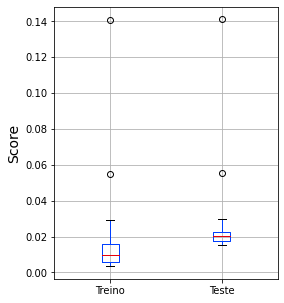

In [ ]:
resultadoso.boxplot(figsize=(4, 5),column=['Treino','Teste'])
plt.ylabel("Score", fontsize = 14)

In [ ]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [ ]:
SEED= 1232
np.random.seed(SEED)
partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3) # resgatar a melhor performance
modelo_arvore.fit(x_treino, y_treino) # aprende
predicoes = modelo_arvore.predict(x_teste) #prever
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados) # para encontrar o intervalo de confiança

Intervalo de confiança 0.026991900905486872 - 0.03280730679128997


# Métricas de avaliação do teste ( Árvore de decisão )

In [ ]:
temporario = y_teste.copy()
temporario

,series
12814,1.656393
16247,-0.474357
16137,1.460434
16606,1.824774
2181,-0.571993
...,...
1464,-0.688453
13297,1.143196
13731,1.511618
11351,-0.840208


In [ ]:
temporario['series'] = predicoes.reshape(3584,1).copy()
temporario

,series
12814,1.813855
16247,-0.703683
16137,1.423672
16606,1.813855
2181,-0.703683
...,...
1464,-0.703683
13297,1.423672
13731,1.423672
11351,-0.703683


In [ ]:
predicoes.reshape(3584,1)

array([[ 1.81385482],
       [-0.70368301],
       [ 1.4236717 ],
       ...,
       [ 1.4236717 ],
       [-0.70368301],
       [ 1.00153654]])

In [ ]:
y_teste

,series
12814,1.656393
16247,-0.474357
16137,1.460434
16606,1.824774
2181,-0.571993
...,...
1464,-0.688453
13297,1.143196
13731,1.511618
11351,-0.840208


Encontrando o NSE e o MAE

NSE = series    0.943917
dtype: float64
MAE = 0.13257240477678695


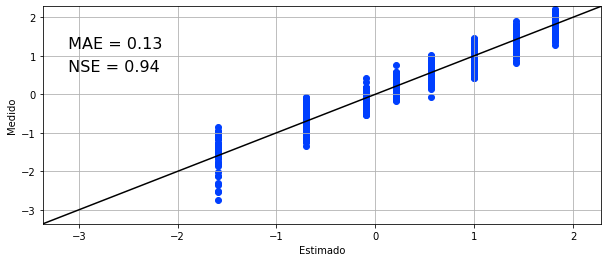

In [ ]:
from sklearn.metrics import mean_absolute_error
#predicoes = predicoes.reshape(1404, 1)
Min = series.min()
Max = series.max()
plt.figure(figsize=(10,4))
plt.scatter(temporario, y_teste)
plt.plot([Min,Max],[Min,Max],'-', c = 'black')
plt.ylim([Min,Max])
plt.xlim([Min,Max])
plt.xticks()
plt.xlabel("Estimado")
plt.yticks()
plt.ylabel("Medido")
plt.grid(True)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)
plt.text(Min+.2,.13*Max+.3," NSE = %.2f"%(NSE(y_teste, temporario)), size = 16)
plt.text(Min+.2,.13*Max+.9," MAE = %.2f"%(mean_absolute_error(y_teste, temporario)), size = 16)
print('NSE =',NSE(y_teste, temporario))
print('MAE =', mean_absolute_error(y_teste, temporario))

In [ ]:
# A eficiência de modelagem Nash e Sutcliffe (NASH e SUTCLIFFE, 1970) limitado (NSE)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)

print('NSE =',NSE(y_teste, temporario))

NSE = series    0.943917
dtype: float64


In [ ]:
# o índice de concordância de Willmott (d)
def d(medido, estimado):
    medido_medio = np.mean( medido )
    s = np.sum( ( estimado - medido )**2 )
    i = np.sum(np.absolute( estimado - medido_medio ) + np.absolute( medido - medido_medio ))
    
    return 1 - s/i

print('d =',d(y_teste, temporario))

d = series    0.983653
dtype: float64


In [ ]:
# coeficiente de correlação de Pearson (r)
def r(medido, estimado):
    medido_medio = np.mean( medido )
    estimado_medio = np.mean( estimado )
    s = np.sum((medido - medido_medio)*(estimado - estimado_medio))
    i = ((np.sum((estimado - estimado_medio)**(2)))**(1/2))*((np.sum((medido - medido_medio)**(2)))**(1/2))

    return s/i

print('r =',r(y_teste, temporario))

r = series    0.98547
dtype: float64


In [ ]:
# O índice de desempenho do modelo (c)
def c(medido, estimado):
    return d(medido, estimado)*r(medido, estimado)

print('c =',c(y_teste, temporario))

c = series    0.96936
dtype: float64


In [ ]:
# Coeficiente de Klinga – Gupta limitado (KGE)
def KGE(medido, estimado):
    desvio_padrao_medido = np.std(medido)
    desvio_padrao_estimado = np.std(estimado)
    estimado_medio = np.mean( estimado )
    kge = 1 - ( (r(medido, estimado) - 1)**2 + ((estimado_medio/medido) - 1)**2 + ((desvio_padrao_estimado/desvio_padrao_medido) - 1)**2 )**(1/2)

    return kge/(2 - kge)

print('KGE =',np.mean(KGE(y_teste, temporario)))

KGE = series   -0.008572
dtype: float64


In [ ]:
# R²
def R2(medido, estimado):
    cima = (len(medido)*(np.sum(medido*estimado))-np.sum(medido)*np.sum(estimado))**2
    baixo = (len(medido)*np.sum((medido)**2)-(np.sum(medido))**2)*(len(medido)*np.sum((estimado)**2)-(np.sum(medido))**2)
    r2 = cima/baixo
    return r2

print(f'R² ={R2(y_teste, temporario)}')

R² =series    0.971113
dtype: float64


In [ ]:
#RMSE -  Raiz do Erro Quadrático Médio
def RMSE(medido, estimado):
    rmse = ((1/len(medido))*(np.sum((medido - estimado)**2)))**(1/2)
    return rmse

print(f'RMSE ={RMSE(y_teste, temporario)}')

RMSE =series    0.172421
dtype: float64


outras metricas


In [ ]:
from sklearn.metrics import explained_variance_score
# Variância explicada 
explained_variance_score(y_teste, temporario)

0.9711500748884145

In [ ]:
from sklearn.metrics import max_error
# Erro máximo ( residual )
max_error(y_teste, temporario)

1.1392685572746557

In [ ]:
from sklearn.metrics import mean_absolute_error
# Erro médio absoluto MAE
mean_absolute_error(y_teste, temporario)

0.13257240477678695

In [ ]:
from sklearn.metrics import mean_squared_error
# Erro quadrático médio
mean_squared_error(y_teste, temporario)

0.029728849795082914

In [ ]:
from sklearn.metrics import r2_score
# score R² 
r2_score(y_teste, temporario)

0.9711496801490994

In [ ]:
#Artur pediu a raiz o r² como parâmetro avaliativo
(r2_score(y_teste, temporario))**(1/2)

0.9854692690028946

In [ ]:
from sklearn.metrics import mean_squared_log_error
# Erro logarítmico médio quadrático
mean_squared_log_error(abs(y_teste), abs(temporario))

0.008812651664596927

In [ ]:
#Erro absoluto mediano 
from sklearn.metrics import median_absolute_error
median_absolute_error(y_teste, temporario)

0.10936642986889378

# Regressão de floresta aleatória

In [ ]:
#entrada = [['tempmedpoceano', 'laninalanino', 'pressaoatmPa', 'tempsolo', 'velocidadedovento']]
# saida = ['ultimo']  já que normalizamos os dados de chuva, então esses não vão ser usados

#[['DoY', 'Tair', 'UR', 'Velocidade_do_vento', 'Rn']]
#dados[entrada]
#valor_saida = dados[saida]
# já que normalizamos os dados
valor_saida = dados[['series']]
valor_entrada = dados[['Tair', 'H', 'Rn']] 

In [ ]:
x = valor_entrada
y = valor_saida

Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
#qualquer valor
SEED = 0 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=SEED)


In [ ]:
len(x_treino)

8361

In [ ]:
len(y_treino)

8361

In [ ]:
x_treino

,Tair,H,Rn
15680,26.700,-11.723000,0.00
14823,22.660,32.805000,0.00
14971,29.190,296.080000,636.90
1645,28.579,-1.794300,90.60
14956,22.530,-4.121800,0.00
...,...,...,...
10205,26.530,-14.320000,0.00
6162,21.640,0.228090,0.00
15374,19.820,-0.061065,15.93
16331,23.580,60.063000,120.20


In [ ]:
y_treino

,series
15680,-0.683480
14823,-0.680336
14971,1.604335
1645,0.218725
14956,-0.754985
...,...
10205,-0.699776
6162,-0.551699
15374,-0.312023
16331,0.427924


In [ ]:
#from sklearn.ensemble import RandomForestRegressor
#modelo = RandomForestRegressor(max_depth=2, random_state=0)
#modelo.fit(x_treino, y_treino)
#predicoes = modelo.predict(x_teste)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
def regressor_arvore(nivel):
    SEED= 0
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = RandomForestRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y.values.ravel(), cv= partes, scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Nivel {nivel} | Treino = {(resultados['train_score']*-1).mean()} | Teste = {(resultados['test_score']*-1).mean()}")
    treino.append((resultados['train_score']*-1).mean())
    teste.append((resultados['test_score']*-1).mean())

In [ ]:
iteracoes = []
treino = []
teste = []
for i in range(1,21):
    resultados = regressor_arvore(i)
    iteracoes.append(i)

Nivel 1 | Treino = 0.1363504901491756 | Teste = 0.13676368040929526
Nivel 2 | Treino = 0.050760452148592206 | Teste = 0.051327636158192004
Nivel 3 | Treino = 0.026149017994165708 | Teste = 0.02684888654525023
Nivel 4 | Treino = 0.019173892877604803 | Teste = 0.01999680966724022
Nivel 5 | Treino = 0.015485788570068184 | Teste = 0.016498535258237766
Nivel 6 | Treino = 0.01363535821014735 | Teste = 0.01486187726248107
Nivel 7 | Treino = 0.012661646289769662 | Teste = 0.014236081938017234
Nivel 8 | Treino = 0.011683931775346278 | Teste = 0.013980380813713042
Nivel 9 | Treino = 0.010718077287744062 | Teste = 0.013923077729212743
Nivel 10 | Treino = 0.009813173485254591 | Teste = 0.013961235958902312
Nivel 11 | Treino = 0.008977274846973657 | Teste = 0.014037839480705883
Nivel 12 | Treino = 0.008221904721840001 | Teste = 0.014121449607928096
Nivel 13 | Treino = 0.007540949550086405 | Teste = 0.01422020817242875
Nivel 14 | Treino = 0.0069217292300731955 | Teste = 0.01431494268081306
Nivel 15 

Resultado da validação cruzada

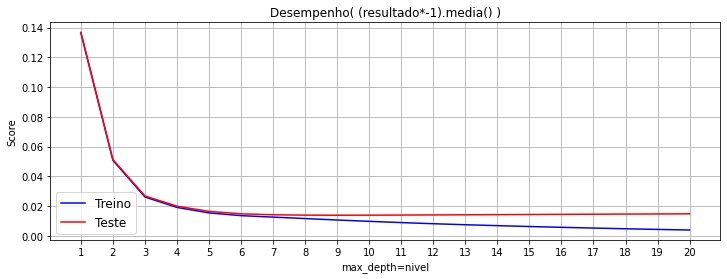

In [ ]:
plt.figure(figsize=(12,4))
plt.plot( iteracoes, treino, color=(0.0, 0.0, 1.0, 1), label = 'Treino')
plt.plot( iteracoes, teste, color=(1.0, 0.0, 0.0, 1), label = 'Teste')
plt.title('Desempenho( (resultado*-1).media() )')
plt.xlabel('max_depth=nivel')
plt.ylabel('Score')
plt.legend(loc='lower left',fontsize = 12)
plt.xticks(iteracoes)
plt.grid('True')
plt.show()

In [ ]:
data = {'treino':  treino,'teste': teste}
resultadoso = pd.DataFrame(data, columns = ['Treino','Teste'])
print (resultadoso)

Empty DataFrame
Columns: [Treino, Teste]
Index: []


In [ ]:
resultadoso['Treino'] = treino
resultadoso['Teste'] = teste

In [ ]:
resultadoso

,Treino,Teste
0,0.136350,0.136764
1,0.050760,0.051328
2,0.026149,0.026849
3,0.019174,0.019997
4,0.015486,0.016499
5,0.013635,0.014862
6,0.012662,0.014236
7,0.011684,0.013980
8,0.010718,0.013923
9,0.009813,0.013961


Text(0, 0.5, 'Score')

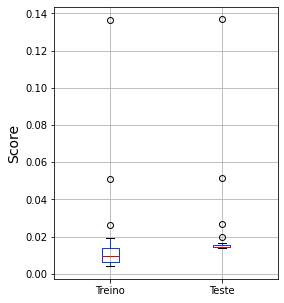

In [ ]:
resultadoso.boxplot(figsize=(4, 5),column=['Treino','Teste'])
plt.ylabel("Score", fontsize = 14)

In [ ]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [ ]:
SEED= 1232
np.random.seed(SEED)
partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = RandomForestRegressor(max_depth=3) # resgatar a melhor performance
modelo_arvore.fit(x_treino, y_treino.values.ravel()) # aprende
predicoes = modelo_arvore.predict(x_teste) #prever
resultados = cross_validate(modelo_arvore, x, y.values.ravel(), cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados) # para encontrar o intervalo de confiança

Intervalo de confiança 0.023928507887430325 - 0.02967255706430693


# Métricas de avaliação do teste ( Floresta aleatória )

In [ ]:
temporario = y_teste.copy()
temporario

,series
12814,1.656393
16247,-0.474357
16137,1.460434
16606,1.824774
2181,-0.571993
...,...
1464,-0.688453
13297,1.143196
13731,1.511618
11351,-0.840208


In [ ]:
temporario['series'] = predicoes.reshape(3584,1).copy()
temporario

,series
12814,1.767810
16247,-0.706417
16137,1.443195
16606,1.815937
2181,-0.706417
...,...
1464,-0.706417
13297,1.443195
13731,1.443195
11351,-0.706417


In [ ]:
predicoes.reshape(3584,1)

array([[ 1.76780956],
       [-0.70641656],
       [ 1.44319504],
       ...,
       [ 1.44319504],
       [-0.70641656],
       [ 1.05097843]])

In [ ]:
y_teste

,series
12814,1.656393
16247,-0.474357
16137,1.460434
16606,1.824774
2181,-0.571993
...,...
1464,-0.688453
13297,1.143196
13731,1.511618
11351,-0.840208


Encontrando o NSE e o MAE

NSE = series    0.951751
dtype: float64
MAE = 0.12439705947039771


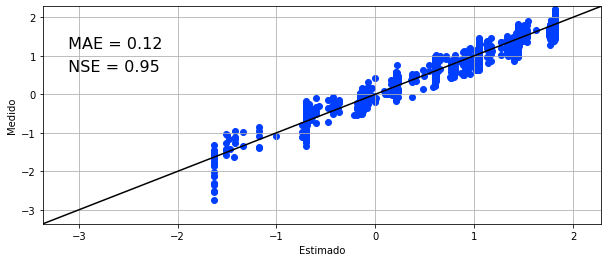

In [ ]:
from sklearn.metrics import mean_absolute_error
#predicoes = predicoes.reshape(1404, 1)
Min = series.min()
Max = series.max()
plt.figure(figsize=(10,4))
plt.scatter(temporario, y_teste)
plt.plot([Min,Max],[Min,Max],'-', c = 'black')
plt.ylim([Min,Max])
plt.xlim([Min,Max])
plt.xticks()
plt.xlabel("Estimado")
plt.yticks()
plt.ylabel("Medido")
plt.grid(True)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)
plt.text(Min+.2,.13*Max+.3," NSE = %.2f"%(NSE(y_teste, temporario)), size = 16)
plt.text(Min+.2,.13*Max+.9," MAE = %.2f"%(mean_absolute_error(y_teste, temporario)), size = 16)
print('NSE =',NSE(y_teste, temporario))
print('MAE =', mean_absolute_error(y_teste, temporario))

In [ ]:
# A eficiência de modelagem Nash e Sutcliffe (NASH e SUTCLIFFE, 1970) limitado (NSE)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)

print('NSE =',NSE(y_teste, temporario))

NSE = series    0.951751
dtype: float64


In [ ]:
# o índice de concordância de Willmott (d)
def d(medido, estimado):
    medido_medio = np.mean( medido )
    s = np.sum( ( estimado - medido )**2 )
    i = np.sum(np.absolute( estimado - medido_medio ) + np.absolute( medido - medido_medio ))
    
    return 1 - s/i

print('d =',d(y_teste, temporario))

d = series    0.985988
dtype: float64


In [ ]:
# coeficiente de correlação de Pearson (r)
def r(medido, estimado):
    medido_medio = np.mean( medido )
    estimado_medio = np.mean( estimado )
    s = np.sum((medido - medido_medio)*(estimado - estimado_medio))
    i = ((np.sum((estimado - estimado_medio)**(2)))**(1/2))*((np.sum((medido - medido_medio)**(2)))**(1/2))

    return s/i

print('r =',r(y_teste, temporario))

r = series    0.987569
dtype: float64


In [ ]:
# O índice de desempenho do modelo (c)
def c(medido, estimado):
    return d(medido, estimado)*r(medido, estimado)

print('c =',c(y_teste, temporario))

c = series    0.97373
dtype: float64


In [ ]:
# Coeficiente de Klinga – Gupta limitado (KGE)
def KGE(medido, estimado):
    desvio_padrao_medido = np.std(medido)
    desvio_padrao_estimado = np.std(estimado)
    estimado_medio = np.mean( estimado )
    kge = 1 - ( (r(medido, estimado) - 1)**2 + ((estimado_medio/medido) - 1)**2 + ((desvio_padrao_estimado/desvio_padrao_medido) - 1)**2 )**(1/2)

    return kge/(2 - kge)

print('KGE =',np.mean(KGE(y_teste, temporario)))

KGE = series   -0.008656
dtype: float64


In [ ]:
# R²
def R2(medido, estimado):
    cima = (len(medido)*(np.sum(medido*estimado))-np.sum(medido)*np.sum(estimado))**2
    baixo = (len(medido)*np.sum((medido)**2)-(np.sum(medido))**2)*(len(medido)*np.sum((estimado)**2)-(np.sum(medido))**2)
    r2 = cima/baixo
    return r2

print(f'R² ={R2(y_teste, temporario)}')

R² =series    0.975234
dtype: float64


In [ ]:
#RMSE -  Raiz do Erro Quadrático Médio
def RMSE(medido, estimado):
    rmse = ((1/len(medido))*(np.sum((medido - estimado)**2)))**(1/2)
    return rmse

print(f'RMSE ={RMSE(y_teste, temporario)}')

RMSE =series    0.159604
dtype: float64


outras metricas


In [ ]:
from sklearn.metrics import explained_variance_score
# Variância explicada 
explained_variance_score(y_teste, temporario)

0.9752801744844904

In [ ]:
from sklearn.metrics import max_error
# Erro máximo ( residual )
max_error(y_teste, temporario)

1.098636245425326

In [ ]:
from sklearn.metrics import mean_absolute_error
# Erro médio absoluto MAE
mean_absolute_error(y_teste, temporario)

0.12439705947039771

In [ ]:
from sklearn.metrics import mean_squared_error
# Erro quadrático médio
mean_squared_error(y_teste, temporario)

0.02547354752542712

In [ ]:
from sklearn.metrics import r2_score
# score R² 
r2_score(y_teste, temporario)

0.9752792321629865

In [ ]:
#Artur pediu a raiz o r² como parâmetro avaliativo
(r2_score(y_teste, temporario))**(1/2)

0.987562267486454

In [ ]:
from sklearn.metrics import mean_squared_log_error
# Erro logarítmico médio quadrático
mean_squared_log_error(abs(y_teste), abs(temporario))

0.00762248896062723

In [ ]:
#Erro absoluto mediano 
from sklearn.metrics import median_absolute_error
median_absolute_error(y_teste, temporario)

0.1033929292735622

# Redes neurais artificiais

In [ ]:
#entrada = [['tempmedpoceano', 'laninalanino', 'pressaoatmPa', 'tempsolo', 'velocidadedovento']]
# saida = ['ultimo']  já que normalizamos os dados de chuva, então esses não vão ser usados

#[['DoY', 'Tair', 'UR', 'Velocidade_do_vento', 'Rn']]
#dados[entrada]
#valor_saida = dados[saida]
# já que normalizamos os dados
valor_saida = dados[['series']]
valor_entrada = dados[['Tair', 'H', 'Rn']] 

In [ ]:
x = valor_entrada
y = valor_saida

Dividindo os dados

In [ ]:
from sklearn.model_selection import train_test_split
#qualquer valor
SEED = 0 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.30, random_state=SEED)


In [ ]:
len(x_treino)

8361

In [ ]:
len(y_treino)

8361

In [ ]:
x_treino

,Tair,H,Rn
15680,26.700,-11.723000,0.00
14823,22.660,32.805000,0.00
14971,29.190,296.080000,636.90
1645,28.579,-1.794300,90.60
14956,22.530,-4.121800,0.00
...,...,...,...
10205,26.530,-14.320000,0.00
6162,21.640,0.228090,0.00
15374,19.820,-0.061065,15.93
16331,23.580,60.063000,120.20


In [ ]:
y_treino

,series
15680,-0.683480
14823,-0.680336
14971,1.604335
1645,0.218725
14956,-0.754985
...,...
10205,-0.699776
6162,-0.551699
15374,-0.312023
16331,0.427924


In [ ]:
maior_nse = np.zeros(shape=(20,20))

In [ ]:
print(maior_nse)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [ ]:
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)

In [ ]:
from sklearn.neural_network import MLPClassifier
for i in range(20):
    for j in range(15):
        clf = MLPClassifier(solver='sgd', max_iter=800, alpha=1e-5,
                            hidden_layer_sizes=(j+1, i+1), random_state=1)
        y_treino=y_treino.astype('int')
        clf.fit(x_treino, y_treino.values.ravel())
        predicoes = clf.predict(x_teste)
        maior_nse[j][i] = NSE(y_teste, predicoes.reshape(3584,1))

In [ ]:
print(maior_nse)

[[-4.25045167e-04 -4.25045167e-04 -3.53350940e-02 -4.25045167e-04
   1.57841499e-02 -3.53350940e-02 -4.25045167e-04  1.68786658e-02
  -4.30011531e-03  3.29101518e-01  1.59590638e-02  3.33722052e-01
   3.33682385e-01  3.32684553e-01  3.33868172e-01  3.54231536e-01
   1.68786658e-02  3.52933776e-01  3.33811497e-01  3.24415834e-01]
 [-4.25045167e-04  3.20177727e-01  3.49999571e-01  3.74582606e-01
   3.84174749e-01  3.52428659e-01  3.81439866e-01  3.70473983e-01
   3.82752848e-01  3.67042632e-01  3.58216640e-01  3.76753594e-01
   3.72786522e-01  3.77563702e-01  3.87461626e-01  3.92522417e-01
   3.94284720e-01  3.84537749e-01  3.87240548e-01  3.65289291e-01]
 [ 3.64015224e-01  3.39045284e-01  3.16946690e-01  3.82245558e-01
   3.93198859e-01  3.83858415e-01  3.51557656e-01  3.83045848e-01
   3.81519882e-01  3.81197158e-01  3.82235164e-01  3.81669148e-01
   3.84996700e-01  3.88283581e-01  3.87021509e-01  3.85692333e-01
   3.84678810e-01  3.84905521e-01  3.83969097e-01  3.79964579e-01]
 [ 3.10

In [ ]:
resultado = np.amax(maior_nse)
print('O valor é : ', resultado)

O valor é :  0.4349791823815138


In [ ]:
# Encontrar a posição do melhor NSE
resultado = np.where(maior_nse == np.amax(maior_nse))
print('O valor é : ', resultado)
print('A posição é : ')
posicoes = list(zip(resultado[0], resultado[1]))
for cord in posicoes:
    print(cord)

O valor é :  (array([4]), array([4]))
A posição é : 
(4, 4)


In [ ]:
clf = MLPClassifier(solver='sgd', max_iter=800, alpha=1e-5, hidden_layer_sizes=cord, random_state=1)

clf.fit(x_treino, y_treino.astype('int').values.ravel())


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(4, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=800,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
predicoes = clf.predict(x_teste)

# Métricas de avaliação do teste ( Redes neurais artificiais )

In [ ]:
temporario = y_teste.copy()
temporario

,series
12814,1.656393
16247,-0.474357
16137,1.460434
16606,1.824774
2181,-0.571993
...,...
1464,-0.688453
13297,1.143196
13731,1.511618
11351,-0.840208


In [ ]:
temporario['series'] = predicoes.reshape(3584,1).copy()
temporario

,series
12814,1
16247,0
16137,1
16606,1
2181,0
...,...
1464,0
13297,1
13731,1
11351,0


In [ ]:
predicoes.reshape(3584,1)

array([[1],
       [0],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [ ]:
y_teste

,series
12814,1.656393
16247,-0.474357
16137,1.460434
16606,1.824774
2181,-0.571993
...,...
1464,-0.688453
13297,1.143196
13731,1.511618
11351,-0.840208


Encontrando o NSE e o MAE

NSE = series    0.383974
dtype: float64
MAE = 0.6297835805514984


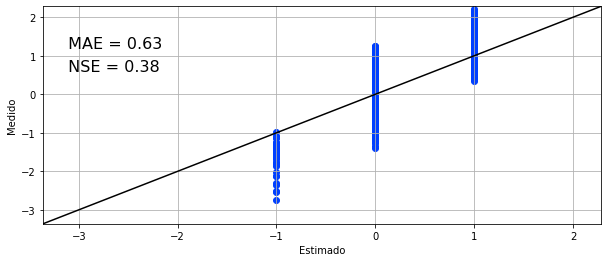

In [ ]:
from sklearn.metrics import mean_absolute_error
#predicoes = predicoes.reshape(1404, 1)
Min = series.min()
Max = series.max()
plt.figure(figsize=(10,4))
plt.scatter(temporario, y_teste)
plt.plot([Min,Max],[Min,Max],'-', c = 'black')
plt.ylim([Min,Max])
plt.xlim([Min,Max])
plt.xticks()
plt.xlabel("Estimado")
plt.yticks()
plt.ylabel("Medido")
plt.grid(True)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)
plt.text(Min+.2,.13*Max+.3," NSE = %.2f"%(NSE(y_teste, temporario)), size = 16)
plt.text(Min+.2,.13*Max+.9," MAE = %.2f"%(mean_absolute_error(y_teste, temporario)), size = 16)
print('NSE =',NSE(y_teste, temporario))
print('MAE =', mean_absolute_error(y_teste, temporario))

In [ ]:
# A eficiência de modelagem Nash e Sutcliffe (NASH e SUTCLIFFE, 1970) limitado (NSE)
def NSE(medido, estimado):
    medido_media = np.mean( medido )
    s = np.sum( ( estimado - medido)**2 )
    i = np.sum( ( medido - medido_media )**2 )
    nse = 1 - s/i
    
    return nse/(2-nse)

print('NSE =',NSE(y_teste, temporario))

NSE = series    0.383974
dtype: float64


In [ ]:
# o índice de concordância de Willmott (d)
def d(medido, estimado):
    medido_medio = np.mean( medido )
    s = np.sum( ( estimado - medido )**2 )
    i = np.sum(np.absolute( estimado - medido_medio ) + np.absolute( medido - medido_medio ))
    
    return 1 - s/i

print('d =',d(y_teste, temporario))

d = series    0.621384
dtype: float64


In [ ]:
# coeficiente de correlação de Pearson (r)
def r(medido, estimado):
    medido_medio = np.mean( medido )
    estimado_medio = np.mean( estimado )
    s = np.sum((medido - medido_medio)*(estimado - estimado_medio))
    i = ((np.sum((estimado - estimado_medio)**(2)))**(1/2))*((np.sum((medido - medido_medio)**(2)))**(1/2))

    return s/i

print('r =',r(y_teste, temporario))

r = series    0.890815
dtype: float64


In [ ]:
# O índice de desempenho do modelo (c)
def c(medido, estimado):
    return d(medido, estimado)*r(medido, estimado)

print('c =',c(y_teste, temporario))

c = series    0.553538
dtype: float64


In [ ]:
# Coeficiente de Klinga – Gupta limitado (KGE)
def KGE(medido, estimado):
    desvio_padrao_medido = np.std(medido)
    desvio_padrao_estimado = np.std(estimado)
    estimado_medio = np.mean( estimado )
    kge = 1 - ( (r(medido, estimado) - 1)**2 + ((estimado_medio/medido) - 1)**2 + ((desvio_padrao_estimado/desvio_padrao_medido) - 1)**2 )**(1/2)

    return kge/(2 - kge)

print('KGE =',np.mean(KGE(y_teste, temporario)))

KGE = series   -0.121117
dtype: float64


In [ ]:
# R²
def R2(medido, estimado):
    cima = (len(medido)*(np.sum(medido*estimado))-np.sum(medido)*np.sum(estimado))**2
    baixo = (len(medido)*np.sum((medido)**2)-(np.sum(medido))**2)*(len(medido)*np.sum((estimado)**2)-(np.sum(medido))**2)
    r2 = cima/baixo
    return r2

print(f'R² ={R2(y_teste, temporario)}')

R² =series    0.604051
dtype: float64


In [ ]:
#RMSE -  Raiz do Erro Quadrático Médio
def RMSE(medido, estimado):
    rmse = ((1/len(medido))*(np.sum((medido - estimado)**2)))**(1/2)
    return rmse

print(f'RMSE ={RMSE(y_teste, temporario)}')

RMSE =series    0.677251
dtype: float64


outras metricas


In [ ]:
from sklearn.metrics import explained_variance_score
# Variância explicada 
explained_variance_score(y_teste, temporario)

0.607801841699247

In [ ]:
from sklearn.metrics import max_error
# Erro máximo ( residual )
max_error(y_teste, temporario)

1.734112795087793

In [ ]:
from sklearn.metrics import mean_absolute_error
# Erro médio absoluto MAE
mean_absolute_error(y_teste, temporario)

0.6297835805514984

In [ ]:
from sklearn.metrics import mean_squared_error
# Erro quadrático médio
mean_squared_error(y_teste, temporario)

0.45866832554380155

In [ ]:
from sklearn.metrics import r2_score
# score R² 
r2_score(y_teste, temporario)

0.5548859781448945

In [ ]:
#Artur pediu a raiz o r² como parâmetro avaliativo
(r2_score(y_teste, temporario))**(1/2)

0.744906690898192

In [ ]:
from sklearn.metrics import mean_squared_log_error
# Erro logarítmico médio quadrático
mean_squared_log_error(abs(y_teste), abs(temporario))

0.21220750462164564

In [ ]:
#Erro absoluto mediano 
from sklearn.metrics import median_absolute_error
median_absolute_error(y_teste, temporario)

0.6662975559944775